# Classification Methods on Advertisement Data

In [102]:
from scipy import stats
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # named as sns after Sameul Norman Seaborn, West wing
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix


In [43]:
data = pd.read_csv('C:/Users/HP/Downloads/Previous Projects/Ad_data.csv')
data.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,69,35,61834,256,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80,31,68442,194,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69,26,59786,237,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74,29,54806,246,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68,35,73890,226,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [47]:
### Dataset Shape and perdictor variables

print("Data shape is:", data.shape)
print("Columns are:", list(data))
print(data.isna().sum())
data.dtypes

Data shape is: (1000, 10)
Columns are: ['Daily_Time_Spent_on_Site', 'Age', 'Area_Income', 'Daily_Internet_Usage', 'Ad_Topic_Line', 'City', 'Male', 'Country', 'Timestamp', 'Clicked_on_Ad']
Daily_Time_Spent_on_Site    0
Age                         0
Area_Income                 0
Daily_Internet_Usage        0
Ad_Topic_Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked_on_Ad               0
dtype: int64


Daily_Time_Spent_on_Site     int64
Age                          int64
Area_Income                  int64
Daily_Internet_Usage         int64
Ad_Topic_Line               object
City                        object
Male                         int64
Country                     object
Timestamp                   object
Clicked_on_Ad                int64
dtype: object

## Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF56E78C18>,
      dtype=object)

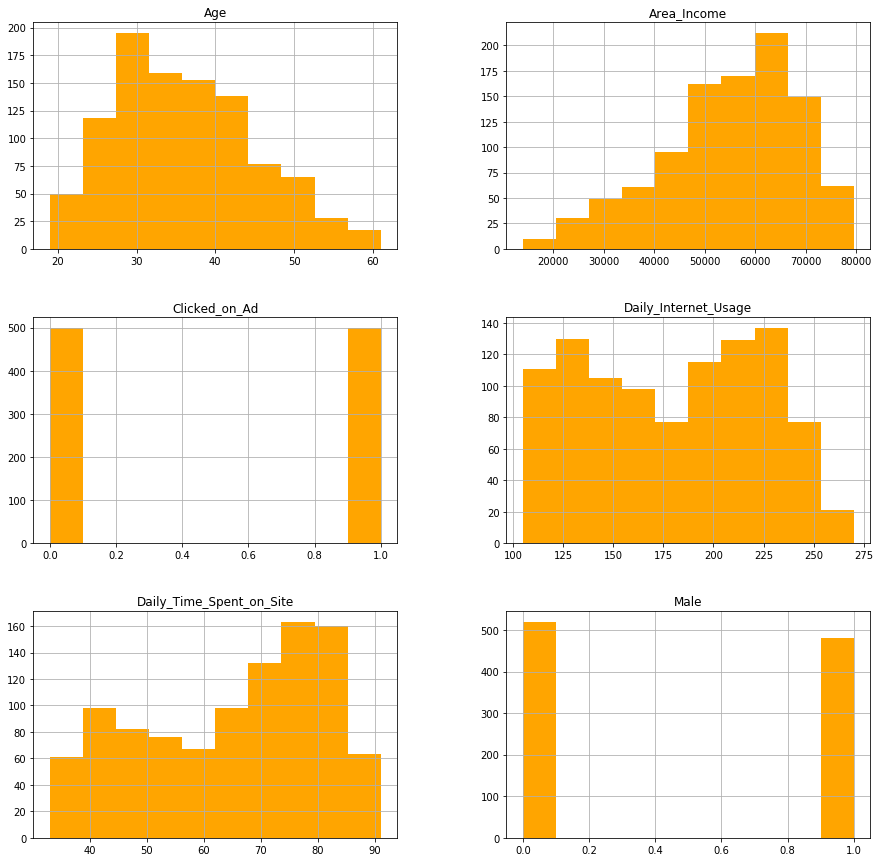

In [48]:
# Histograms of data
data.hist(figsize=[15,15],color = "orange")

 
### Note that

## Numeric/Continous Variables: Int64 dtype

### 'Daily_Time_Spent_on_Site'
### 'Age'
### 'Area_Income'
### 'Daily_Internet_Usage'
 
## Nominal variables: Object dtype

### 'Ad_Topic_Line'
### 'City'
### 'Country'

## Of Int64, we have Binary Classification data

### 'Male'
### 'Clicked_on_Ad' --> Response variable

## Univariate Analysis

In [51]:
data.corr()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad
Daily_Time_Spent_on_Site,1.000000,-0.331808,0.310269,0.518227,-0.019643,-0.747652
Age,-0.331808,1.000000,-0.182605,-0.367274,-0.021044,0.492531
Area_Income,0.310269,-0.182605,1.000000,0.337582,0.001323,-0.476255
Daily_Internet_Usage,0.518227,-0.367274,0.337582,1.000000,0.027679,-0.786349
Male,-0.019643,-0.021044,0.001323,0.027679,1.000000,-0.038027
Clicked_on_Ad,-0.747652,0.492531,-0.476255,-0.786349,-0.038027,1.000000


### Pointbiserial is used for correlation measure between binary and continuous variables
###  We have same correaltion from pearson and pbr method
### No correlation tests exist for Binary/Numeric and Categorical Variables to my knowledge, we can use R square for that

In [54]:
stats.pointbiserialr(data['Clicked_on_Ad'], data['Daily_Time_Spent_on_Site'])

PointbiserialrResult(correlation=-0.7476516104967055, pvalue=1.2926138862889027e-179)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


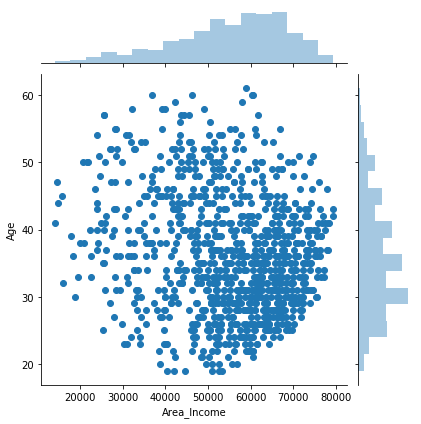

In [65]:
sns.jointplot(data['Area_Income'], data['Age'])

In [96]:
age = data['Age'].astype(float)
ageroot = np.sqrt(age)
agelog = np.log(age)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


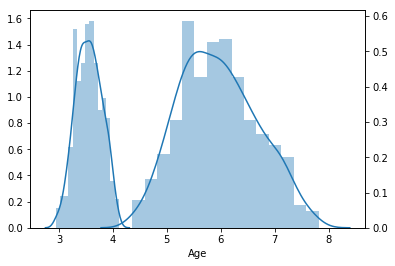

In [110]:
fig, ax =plt.subplots()
sns.distplot(agelog, bins=15, ax= ax)
ax2 = ax.twinx()
sns.distplot(ageroot, bins=15, ax= ax2)
fig.show()

In [117]:
income = data['Area_Income'].astype(float)
incomeroot = np.square(income)
incomelog = np.log(income)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


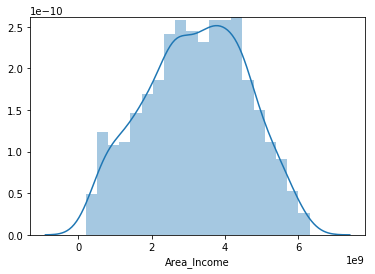

In [121]:
#fig, ax =plt.subplots()
#sns.distplot(incomelog, bins=15)
#ax2 = ax.twinx()
sns.distplot(incomeroot, bins=20)
#fig.show()